In [46]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model, svm
import statsmodels.api as sm
import numpy as np

In [47]:
df = pd.read_csv("SDSS-DR14.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


## Data Description
- Position Data
    - objid: Object ID
    - ra: Right Ascension
    - dec: Declination

- Wavelength magnitude {u,g,r,i,z}
    - u: Ultraviolet
    - g: Green
    - r: Red
    - i: Infrared - 7600 Â
    - z: Infrared - 9100 Â

- Optical obs {redshift,plate,mjd,fiberid}
    - redshift: Wavelenght displacement
    - plate: SDSS plug plate used
    - mjd: Modified Julian Date
    - fiberid: Fiber number

Following data will not be used because they do not describe object characteristics

- objid
- ra
- dec
- run
- rerun
- camcol
- field
- specobjid
- plate
- mjd
- fiberid

In [48]:
#Drop unused columns
df.drop(columns = ['objid','ra','dec','run','rerun','camcol','field','specobjid','plate','mjd','fiberid'], inplace=True)

<Figure size 648x648 with 0 Axes>

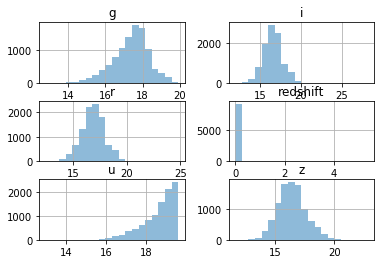

In [49]:
fig = plt.figure(figsize = (9,9))
ax = df.hist(bins = 20, alpha = 0.5)

In [50]:
Y = df['class']
Y_star = df['class'].replace({'STAR':1,'GALAXY':0,'QSO':0})
Y_galax = df['class'].replace({'STAR':0,'GALAXY':1,'QSO':0})
Y_qso = df['class'].replace({'STAR':0,'GALAXY':0,'QSO':1})

In [51]:
X = df.drop(columns = ['class', 'redshift'])

In [52]:
def estimate(X,Y):
    return sm.OLS(Y,X).fit()

In [53]:
def predict(est, params):
    return np.inner(est.params.values,params)

In [54]:
stars_est = estimate(X,Y_star)

In [55]:
galaxy_est = estimate(X,Y_galax)

In [56]:
qso_est = estimate(X,Y_qso)

In [57]:
print(predict(stars_est, X.iloc[9995,]))

0.4821769116973371


In [58]:
print(predict(galaxy_est, X.iloc[9995,]))

0.48572507838580226


In [59]:
print(predict(qso_est, X.iloc[9995,]))

0.04435176737802138


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sb

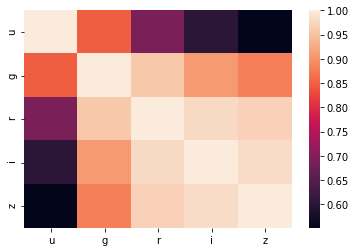

In [61]:
sb.heatmap(X.corr())

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_star, test_size = .3, random_state=25)
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
#Predicciones
y_pred = LogReg.predict(X_test)

In [63]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1599,  101],
       [  96, 1204]])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1700
           1       0.92      0.93      0.92      1300

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_galax, test_size = .3, random_state=25)
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1547
           1       0.89      0.88      0.89      1453

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_qso, test_size = .3, random_state=25)
#Aprendizaje
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2753
           1       0.84      0.77      0.80       247

    accuracy                           0.97      3000
   macro avg       0.91      0.88      0.89      3000
weighted avg       0.97      0.97      0.97      3000



# Decision tree

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [70]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1320    9  124]
 [  28  203   16]
 [ 142   22 1136]]
              precision    recall  f1-score   support

      GALAXY       0.89      0.91      0.90      1453
         QSO       0.87      0.82      0.84       247
        STAR       0.89      0.87      0.88      1300

    accuracy                           0.89      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.89      0.89      0.89      3000



In [71]:
from sklearn.externals.six import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['u','g','r','i','z']
classes=['STAR','GALAXY','QSO']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')

rm: cannot remove '/home/eduvera/.cache/matplotlib': No such file or directory
